Epoch 1/50
196/196 [==============================] - 7s 31ms/step - loss: 0.6502 - val_loss: 0.6317
Epoch 2/50
196/196 [==============================] - 11s 57ms/step - loss: 0.6277 - val_loss: 0.6244
Epoch 3/50
196/196 [==============================] - 10s 53ms/step - loss: 0.6161 - val_loss: 0.6122
Epoch 4/50
196/196 [==============================] - 6s 29ms/step - loss: 0.6089 - val_loss: 0.6067
Epoch 5/50
196/196 [==============================] - 7s 34ms/step - loss: 0.6050 - val_loss: 0.6030
Epoch 6/50
196/196 [==============================] - 7s 34ms/step - loss: 0.6015 - val_loss: 0.6005
Epoch 7/50
196/196 [==============================] - 7s 34ms/step - loss: 0.5983 - val_loss: 0.5971
Epoch 8/50
196/196 [==============================] - 6s 29ms/step - loss: 0.5957 - val_loss: 0.5949
Epoch 9/50
196/196 [==============================] - 7s 34ms/step - loss: 0.5938 - val_loss: 0.5935
Epoch 10/50
196/196 [==============================] - 6s 30ms/step - loss: 0.5925 - val_

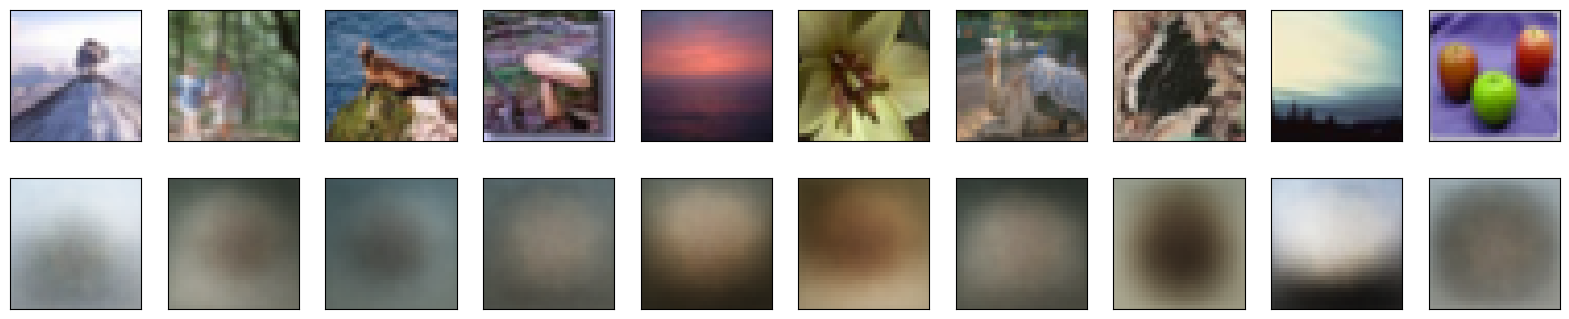

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100  # Import CIFAR-100 dataset

# Load the CIFAR-100 dataset
(x_train, _), (x_test, _) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(3072,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))  # CIFAR-100 images are 32x32x3
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))  # CIFAR-100 images are 32x32x3
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
